In [1]:
import numpy as np
from strlearn.streams import StreamGenerator
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from strlearn.streams import StreamGenerator


stream = StreamGenerator(
  n_classes=2,
  n_features=2,
  n_informative=2,
  n_redundant=0,
  n_repeated=0,
  random_state=105,
  n_chunks=50,
  chunk_size=100,
  n_drifts=5
)

X,y = [],[]

for _ in range(50):
    x,yy = stream.get_chunk()
    X.append(x)
    y.append(yy)

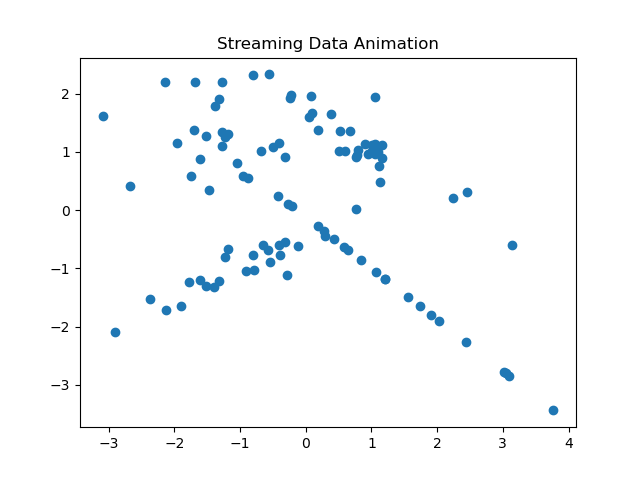

In [3]:
%matplotlib ipympl
fig, ax = plt.subplots()
sc = ax.scatter(x=X[0][:,0],y=X[0][:,1])  
ax.set_title("Streaming Data Animation")



def update(frame):
    x_plot = X[frame+1]
    y_plot =y[frame+1]
   # data = np.stack([x_plot[:,0],x_plot[:,1],y_plot]).T
    sc.set_offsets(x_plot)
    sc.set_array(y_plot)
    return sc,


ani = animation.FuncAnimation(fig, func=update, frames=49, interval=1000)

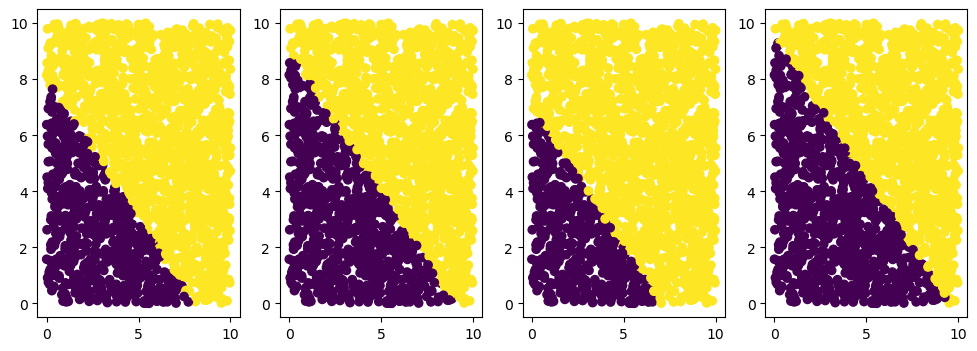

In [2]:
from river.datasets import synth


fig,ax = plt.subplots(1,4,figsize=(12,4))
for variant in range(4):
    dataset = synth.SEA(variant=variant, seed=42)

    C1 = []
    yc1 = []
    for x, y in dataset.take(2000):
        C1.append(list(x.values()))
        yc1.append(1*y)

    DATA = np.vstack(C1)

    ax[variant].scatter(DATA[:,0],DATA[:,1],c=yc1)

100%|██████████| 1/1 [01:09<00:00, 69.21s/it]

Query instance (original outcome : 1)



/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3,target
0,4.963287,8.749931,5.206876,1



Diverse Counterfactual set (new outcome: 0)


/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3,target
777,2.5873837471,5.1067624092,5.1879777908,0.0
1445,1.77036643028,5.9758419991,6.3104753494,0.0
77,1.85824966431,5.9503512383,6.7521257401,0.0
1403,2.10752391815,5.8100819588,3.2543621063,0.0
1225,3.77198219299,4.2850780487,5.5659861565,0.0
652,1.78473627567,5.3725848198,5.2884254456,0.0
183,0.75996476412,6.9061441422,6.2724237442,0.0
564,1.99057877064,5.0912251472,5.0007791519,0.0
1048,2.80346655846,4.9161920547,6.9618282318,0.0
691,3.70704913139,4.1393017769,5.6252474785,0.0


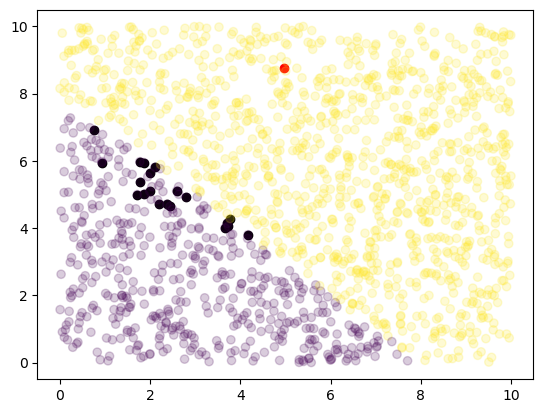

In [130]:
from sklearn.svm import SVC
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers  # helper functions
from sklearn.model_selection import train_test_split
import pandas as pd


dataset = synth.SEA(variant=0, seed=42)
X_C1 = []
yc1 = []
for x, y in dataset.take(2000):
    X_C1.append(list(x.values()))
    yc1.append(1*y)

X_C1 = np.array(X_C1)
yc1= np.array(yc1)

dataset = pd.DataFrame(X_C1,columns=['1','2','3'])
dataset['target'] = yc1;

target = dataset['target']

train_dataset, test_dataset, y_train, y_test= train_test_split(dataset,target,test_size=0.2,random_state=0,stratify=target)
x_train = train_dataset.iloc[:,:-1]
x_test = test_dataset.iloc[:,:-1]
train_dataset.columns


classifier =  SVC(C=.5, probability=True)
classifier.fit(x_train, y_train)

d = dice_ml.Data(dataframe=train_dataset, continuous_features=['1', '2','3'], outcome_name='target')
m = dice_ml.Model(model=classifier, backend="sklearn")
exp = dice_ml.Dice(d, m, method="kdtree")

e1 = exp.generate_counterfactuals(x_test[20:21], total_CFs=20, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True);


cf = e1.to_json()
import json
data_cf = json.loads(cf)
sample = data_cf['test_data'][0][0]
cfs_examples = np.array(data_cf['cfs_list'][0])



plt.scatter(cfs_examples[:,0],cfs_examples[:,1],c='black')
plt.scatter(sample[0],sample[1],c='red')
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,alpha=0.2)

100%|██████████| 1/1 [00:07<00:00,  7.94s/it]

Query instance (original outcome : 1)



/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3,target
0,4.963287,8.749931,5.206876,1



Diverse Counterfactual set (new outcome: 0)


/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3,target
71,1.9172722101,5.7189445496,4.393127,0.0
771,1.9366443157,5.9819335938,6.8555121,0.0
1455,2.4770402908,5.4133143425,3.3915331,0.0
829,2.928394556,4.6820940971,5.6648197,0.0
942,0.6783261299,7.1544456482,4.7341394,0.0
174,2.2678468227,4.9953694344,4.6775289,0.0
141,1.4924763441,6.4161520004,3.1657689,0.0
105,0.968949616,6.3699102402,4.7430596,0.0
507,1.9416546822,5.2325992584,4.5746546,0.0
417,3.5933301449,4.41528368,4.0600138,0.0


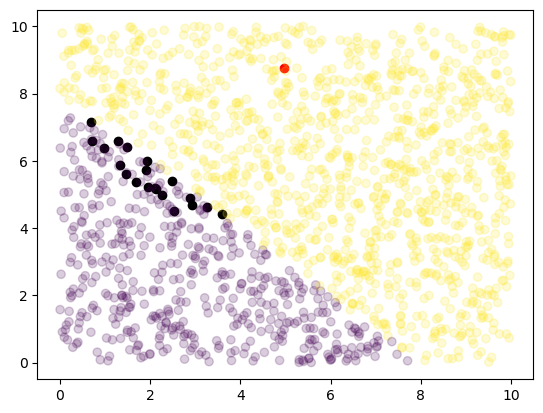

In [ ]:
dataset = synth.SEA(variant=0, seed=1000)
X_C1 = []
yc1 = []
for x, y in dataset.take(2000):
    X_C1.append(list(x.values()))
    yc1.append(1*y)

X_C1 = np.array(X_C1)
yc1= np.array(yc1)

dataset2 = pd.DataFrame(X_C1,columns=['1','2','3'])
dataset2['target'] = yc1;

target2 = dataset2['target']

train_dataset2, test_dataset2, y_train2, y_test2= train_test_split(dataset2,target2,test_size=0.2,random_state=0,stratify=target)
x_train2 = train_dataset2.iloc[:,:-1]
x_test2 = test_dataset2.iloc[:,:-1]

classifier2 =  SVC(C=.5, probability=True)
classifier2.fit(x_train2, y_train2)

d = dice_ml.Data(dataframe=train_dataset2, continuous_features=['1', '2','3'], outcome_name='target')
m = dice_ml.Model(model=classifier2, backend="sklearn")
exp = dice_ml.Dice(d, m, method="kdtree")

e1 = exp.generate_counterfactuals(x_test[20:21], total_CFs=20, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True);


cf = e1.to_json()
import json
data_cf = json.loads(cf)
sample = data_cf['test_data'][0][0]
cfs_examples1 = np.array(data_cf['cfs_list'][0])



plt.scatter(cfs_examples1[:,0],cfs_examples1[:,1],c='black')
plt.scatter(sample[0],sample[1],c='red')
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,alpha=0.2)

100%|██████████| 1/1 [02:02<00:00, 122.53s/it]

Query instance (original outcome : 0)



/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3,target
0,4.963287,8.749931,5.206876,0



Diverse Counterfactual set (new outcome: 1)


/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3,target
504,-0.1222654954,9.0671472549,4.9877658,1.0
1674,-0.3950531483,9.5811634064,5.570838,1.0
1905,-0.2481958568,9.429851532,6.6802411,1.0
1891,-0.4650185704,8.9130897522,5.788341,1.0
1357,-0.2160800993,9.6758136749,2.7328198,1.0
1270,-0.5126962066,8.9019489288,3.1211405,1.0
772,-0.3632497787,9.5878543854,7.7690034,1.0
1508,-0.946180582,8.961602211,3.8950121,1.0
1515,-0.7450869083,9.8030099869,3.2673566,1.0
576,-1.053868413,8.2245368958,3.6192119,1.0


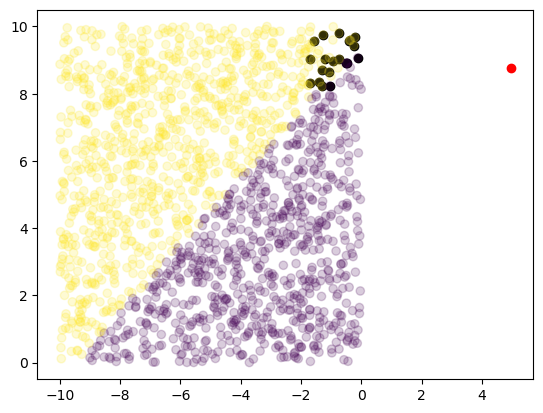

In [173]:
dataset = synth.SEA(variant=3, seed=10)
X_C1 = []
yc1 = []
for x, y in dataset.take(2000):
    X_C1.append(list(x.values()))
    yc1.append(1*y)


R = np.array([[-1,0],[0,1]])

X_C1 = np.hstack((np.array(X_C1)[:,:2]@R,np.array(X_C1)[:,2][:,None]))
yc1= np.array(yc1)

dataset2 = pd.DataFrame(X_C1,columns=['1','2','3'])
dataset2['target'] = yc1;

target2 = dataset2['target']

train_dataset2, test_dataset2, y_train2, y_test2= train_test_split(dataset2,target2,test_size=0.2,random_state=0,stratify=target)
x_train2 = train_dataset2.iloc[:,:-1]
x_test2 = test_dataset2.iloc[:,:-1]

classifier2 =  SVC(C=.5, probability=True)
classifier2.fit(x_train2, y_train2)

d = dice_ml.Data(dataframe=train_dataset2, continuous_features=['1', '2','3'], outcome_name='target')
m = dice_ml.Model(model=classifier2, backend="sklearn")
exp = dice_ml.Dice(d, m, method="kdtree")

e1 = exp.generate_counterfactuals(x_test[20:21], total_CFs=20, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True);


cf = e1.to_json()
import json
data_cf = json.loads(cf)
sample = data_cf['test_data'][0][0]
cfs_examples = np.array(data_cf['cfs_list'][0])



plt.scatter(cfs_examples[:,0],cfs_examples[:,1],c='black')
plt.scatter(sample[0],sample[1],c='red')
plt.scatter(x_train2.iloc[:,0],x_train2.iloc[:,1],c=y_train2,alpha=0.2)

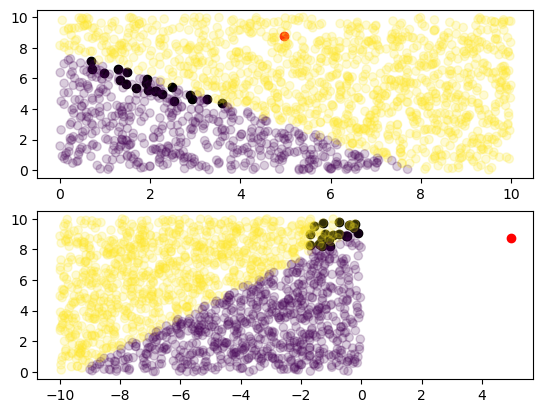

In [175]:
fig,ax = plt.subplots(2,1)

ax[1].scatter(cfs_examples[:,0],cfs_examples[:,1],c='black')
ax[1].scatter(sample[0],sample[1],c='red')
ax[1].scatter(x_train2.iloc[:,0],x_train2.iloc[:,1],c=y_train2,alpha=0.2)

ax[0].scatter(cfs_examples1[:,0],cfs_examples1[:,1],c='black')
ax[0].scatter(sample[0],sample[1],c='red')
ax[0].scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,alpha=0.2)

In [185]:
print(cfs_examples[:,:2].mean(axis=0))
print(cfs_examples1[:,:2].mean(axis=0))

[-0.91550373  9.03962226]
[1.97984177 5.54029129]


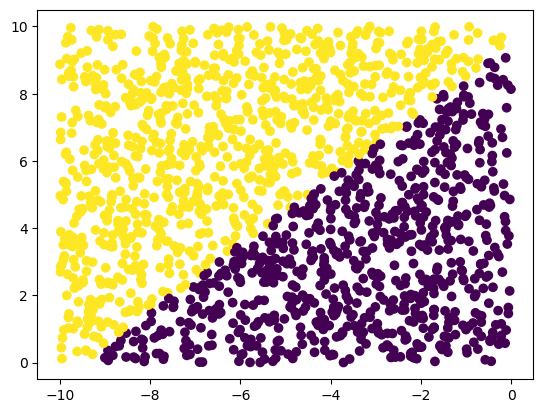

In [174]:
R = np.array([[-1,0],[0,1]])

ROT = x_train2.iloc[:,:2]
plt.scatter(ROT.iloc[:,0],ROT.iloc[:,1],c=y_train2)


In [148]:
x_train2

/home/sven/miniconda3/envs/drift/lib/python3.10/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,1,2,3
1892,8.324237,0.122855,4.968802
913,6.152995,4.605936,5.869572
949,3.671464,4.830203,6.380436
1560,2.965770,3.919613,8.119683
49,1.946563,2.077027,0.960009
...,...,...,...
1024,1.708743,1.053375,4.180151
1471,5.248400,1.265002,4.089002
732,3.332096,8.000458,2.014461
1423,2.273437,7.907160,5.209568


In [ ]:
query_instances = x_test[:20]
imp = exp.global_feature_importance(query_instances)
print(imp.summary_importance)

UserConfigValidationException: The number of query instances should be greater than or equal to 10 to compute global feature importance over all query points

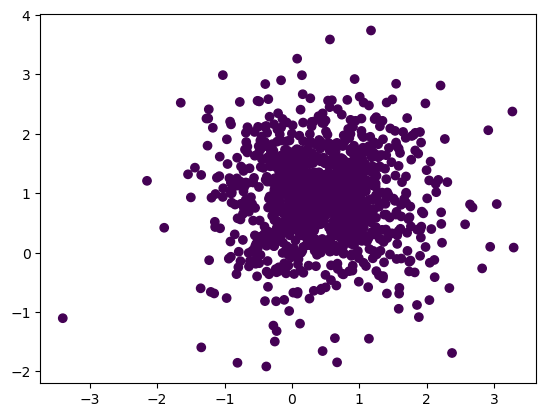

In [ ]:
dataset = synth.RandomRBFDrift(seed_model=0, seed_sample=4,
                               n_classes=3, n_features=2, n_centroids=2,
                               change_speed=0.0, n_drift_centroids=1)


X,yrbf = [],[]
for x, y in dataset.take(5000):
    X.append(list(x.values()))
    yrbf.append(y)

DATA = np.vstack(X)

plt.scatter(DATA[:,0],DATA[:,1],c=yrbf)